In [1]:
%%capture
import orca
import warnings; warnings.filterwarnings("ignore")

from lcog import datasources
from lcog import variables
from lcog import models

orca.run(['build_networks'])

%matplotlib inline

In [2]:
from urbansim.models import util
from urbansim_templates import modelmanager as mm
from urbansim_templates.models import OLSRegressionStep

mm.initialize()

Registering model step 'elcm5'
Registering model step 'tenure_choice_model'
Registering model step 'repm_sf_detached'
Registering model step 'repm_industrial'
Registering model step 'repm_duplex_townhome'
Registering model step 'elcm12'
Registering model step 'tenure_choice_model2'
Registering model step 'elcm6'
Registering model step 'tenure_choice_model1'
Registering model step 'elcm9'
Registering model step 'elcm1'
Registering model step 'elcm11'
Registering model step 'elcm2'
Registering model step 'repm_multifamily'
Registering model step 'elcm7'
Registering model step 'repm_retail'
Registering model step 'elcm10'
Registering model step 'elcm3'
Registering model step 'elcm8'
Registering model step 'elcm13'
Registering model step 'elcm15'
Registering model step 'elcm4'
Registering model step 'repm_office'
Registering model step 'hlcm2'
Registering model step 'household_relocation_choice_model'
Registering model step 'elcm14'
Registering model step 'hlcm1'
Registering model step 'te

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

from bokeh.io import output_notebook, show
from bokeh.plotting import Figure
from datashader.bokeh_ext import create_ramp_legend, create_categorical_legend

output_notebook()

import datashader.transfer_functions as tf

import datashader as ds
from datashader.colors import viridis

import seaborn as sb

def visualize_variable(variable_name):
    p = orca.get_table('buildings').to_frame(['x', 'y', variable_name])
    
    cvs = ds.Canvas(plot_width=1000, plot_height=700)
    agg = cvs.points(p, 'x', 'y', ds.mean(variable_name))
    img = tf.set_background(tf.shade(agg, cmap=viridis),"white")
    return img

def scatter_plot(var1, var2, building_filter):
    buildings = orca.get_table('buildings').to_frame(['repm_id',var1, var2])
    b1 = buildings.query(building_filter)
    ax = sns.scatterplot(x=var1, y=var2,  data=b1)
    return ax

Loading BokehJS ...

## REPM sf-detached

In [4]:
m = OLSRegressionStep()

m.tables = ['buildings']

building_filter = '(impval_per_unit > 0) & (repm_id == "res_sf_detached")'
m.filters = building_filter

m.out_column = 'pred_sf_detached_price'

In [5]:
model_spec = {'left_side': 'impval_per_unit',
              'right_side': {'block_groups_prop_income_quartile_4',
              'block_groups_total_jobs',
              'blocks_density_buildings',
              'parcels_mean_age_of_head_ave_2800_flat',
              'parcels_mean_income_ave_4400_linear',
              'sqft_per_unit',
              'year_built',
              'zone_subdistricts_prop_building_type_id_1220',
              'zone_subdistricts_sum_non_residential_sqft',
              'zones_prop_building_type_id_5100',
              'zones_prop_sector_id_2',
              'zones_sum_persons_25_md_offpeak_travel_time',
              'zones_sum_residential_units',
              'zones_total_jobs_10_am_peak_travel_time'}}

m.model_expression = util.str_model_expression(model_spec)
m.fit()

Disaggregating sum_residential_units to buildings from zones
Calculating sum_residential_units of buildings for zones
Disaggregating zone_id to buildings from parcels
Disaggregating prop_income_quartile_4 to buildings from block_groups
Disaggregating block_group_id to households from parcels
Calculating proportion income_quartile 4 for block_groups
Calculating number of households for block_groups
Disaggregating block_group_id to buildings from parcels
Disaggregating mean_age_of_head_ave_2800_flat to buildings from parcels
Calculating mean_age_of_head of households for parcels
Disaggregating prop_building_type_id_5100 to buildings from zones
Calculating proportion building_type_id 5100 for zones
Calculating number of buildings for zones
Disaggregating sum_non_residential_sqft to buildings from zone_subdistricts
Calculating sum_non_residential_sqft of buildings for zone_subdistricts
Disaggregating zone_subdistrict_id to buildings from parcels
Disaggregating sum_persons_25_md_offpeak_tra

Disaggregating density_households to buildings from blocks
Calculating density of households for blocks
Calculating number of households for blocks
Disaggregating block_id to households from parcels
Disaggregating x to buildings from parcels
Disaggregating y to buildings from parcels


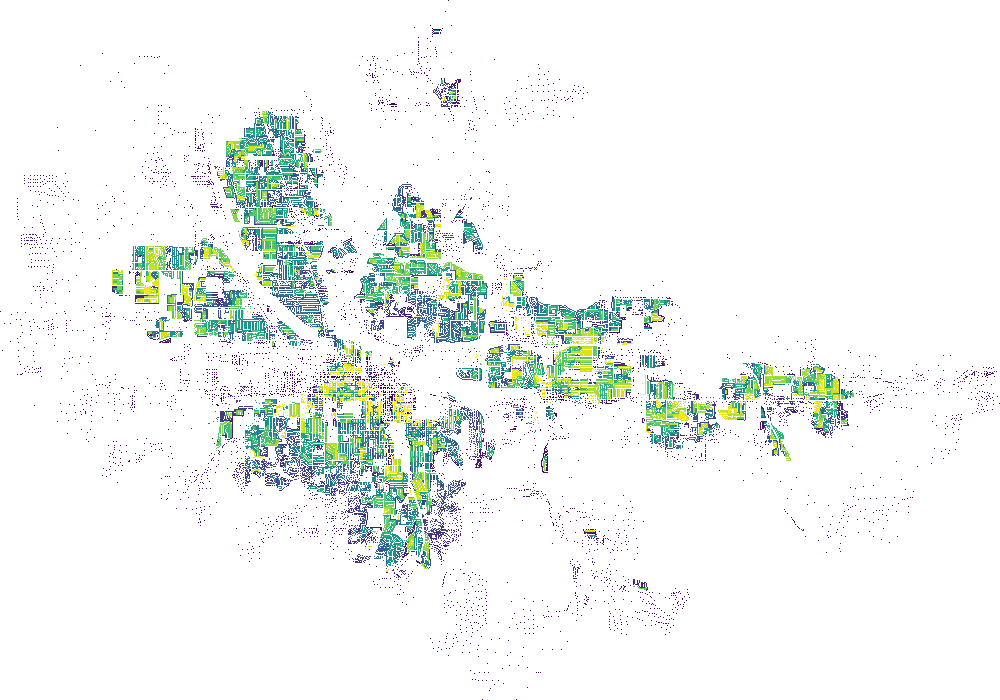

In [6]:
visualize_variable('blocks_density_households')

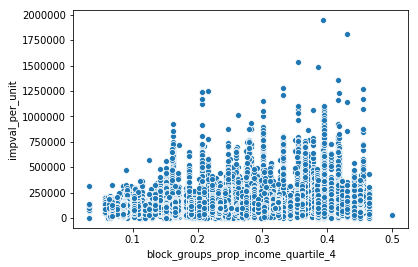

In [7]:
scatter_plot("block_groups_prop_income_quartile_4", "impval_per_unit", building_filter)

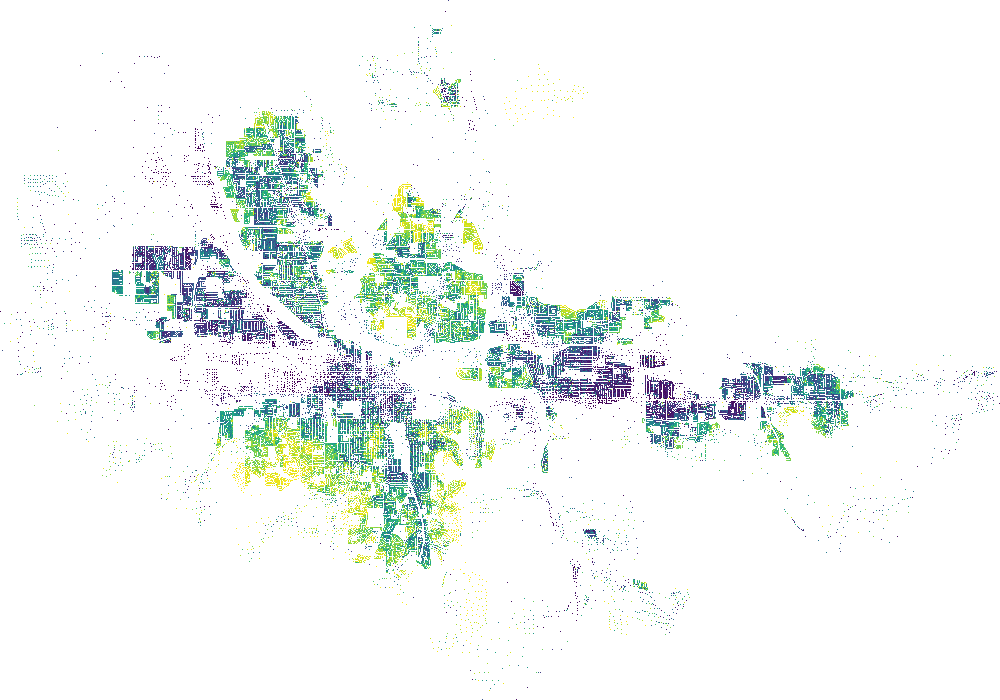

In [8]:
m.run()
visualize_variable('pred_sf_detached_price')

In [9]:
m.name = 'repm_sf_detached'
mm.register(m)

Saving 'repm_sf_detached.yaml': /home/janowicz/clients/lcog/lcog/lcog/configs
Registering model step 'repm_sf_detached'


## REPM- duplex / townhome

In [10]:
m = OLSRegressionStep()

m.tables = ['buildings']
m.filters = '(impval_per_unit > 0) & (repm_id == "duplex_townhome")'

m.out_column = 'pred_duplex_townhome_price'

In [11]:
model_spec = {'left_side': 'impval_per_unit',
              'right_side': {'blocks_density_households',
              'blocks_total_jobs',
              'parcels_mean_age_of_head_ave_3600_linear',
              'parcels_total_jobs_sum_1200_linear',
              'sqft_per_unit',
              'year_built',
              'zone_districts_sum_residential_units',
              'zone_subdistricts_prop_building_type_id_1220',
              'zone_subdistricts_prop_building_type_id_5100',
              'zone_subdistricts_sum_non_residential_sqft',
              'zones_prop_income_quartile_4',
              'zones_prop_sector_id_3',
              'zones_sum_persons_5_am_peak_travel_time',
              'zones_total_jobs_10_am_peak_travel_time'}}

m.model_expression = util.str_model_expression(model_spec)
m.fit()

Disaggregating prop_sector_id_3 to buildings from zones
Calculating proportion sector_id 3 for zones
Disaggregating sum_persons_5_am_peak_travel_time to buildings from zones
Disaggregating sum_residential_units to buildings from zone_districts
Calculating sum_residential_units of buildings for zone_districts
Disaggregating zone_district_id to buildings from parcels
Disaggregating prop_income_quartile_4 to buildings from zones
Calculating proportion income_quartile 4 for zones
Calculating number of households for zones
Disaggregating mean_age_of_head_ave_3600_linear to buildings from parcels
Disaggregating total_jobs to buildings from blocks
Calculating number of jobs for blocks
Disaggregating block_id to jobs from parcels
Disaggregating prop_building_type_id_5100 to buildings from zone_subdistricts
Calculating proportion building_type_id 5100 for zone_subdistricts
Disaggregating total_jobs_sum_1200_linear to buildings from parcels
Calculating number of jobs for parcels
                

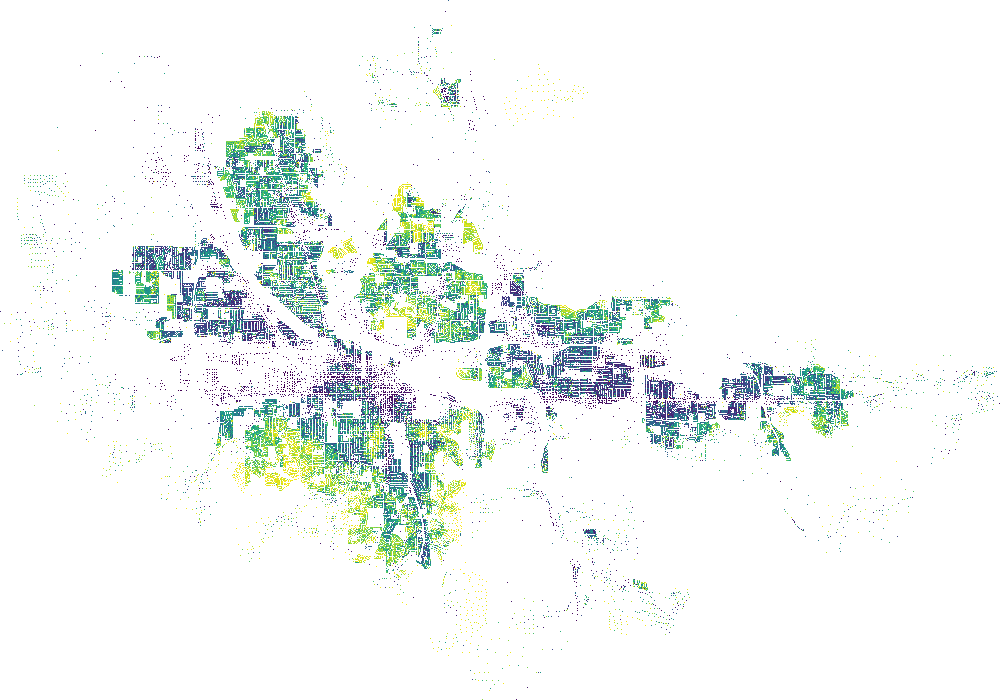

In [12]:
m.run()
visualize_variable('pred_duplex_townhome_price')

In [13]:
m.name = 'repm_duplex_townhome'
mm.register(m)

Saving 'repm_duplex_townhome.yaml': /home/janowicz/clients/lcog/lcog/lcog/configs
Registering model step 'repm_duplex_townhome'


## REPM- multifamily

In [14]:
m = OLSRegressionStep()

m.tables = ['buildings']
m.filters = '(impval_per_unit > 0) & (repm_id == "multifamily")'

m.out_column = 'pred_multifamily_price'

In [15]:
model_spec = {'left_side': 'impval_per_unit',
              'right_side': {'block_groups_prop_income_quartile_4',
              'blocks_density_buildings',
              'blocks_prop_building_type_id_1220',
              'blocks_prop_sector_id_11',
              'parcels_mean_children_ave_3600_flat',
              'sqft_per_unit',
              'year_built',
              'zone_districts_sum_residential_units',
              'zone_subdistricts_mean_non_residential_sqft',
              'zones_prop_building_type_id_5100',
              'zones_total_jobs_25_am_peak_travel_time'}}

m.model_expression = util.str_model_expression(model_spec)
m.fit()

Disaggregating prop_sector_id_11 to buildings from blocks
Calculating proportion sector_id 11 for blocks
Disaggregating mean_children_ave_3600_flat to buildings from parcels
Calculating mean_children of households for parcels
Disaggregating total_jobs_25_am_peak_travel_time to buildings from zones
Disaggregating prop_building_type_id_1220 to buildings from blocks
Calculating proportion building_type_id 1220 for blocks
Disaggregating mean_non_residential_sqft to buildings from zone_subdistricts
Calculating mean_non_residential_sqft of buildings for zone_subdistricts
                            OLS Regression Results                            
Dep. Variable:        impval_per_unit   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     620.4
Date:                Fri, 25 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:4

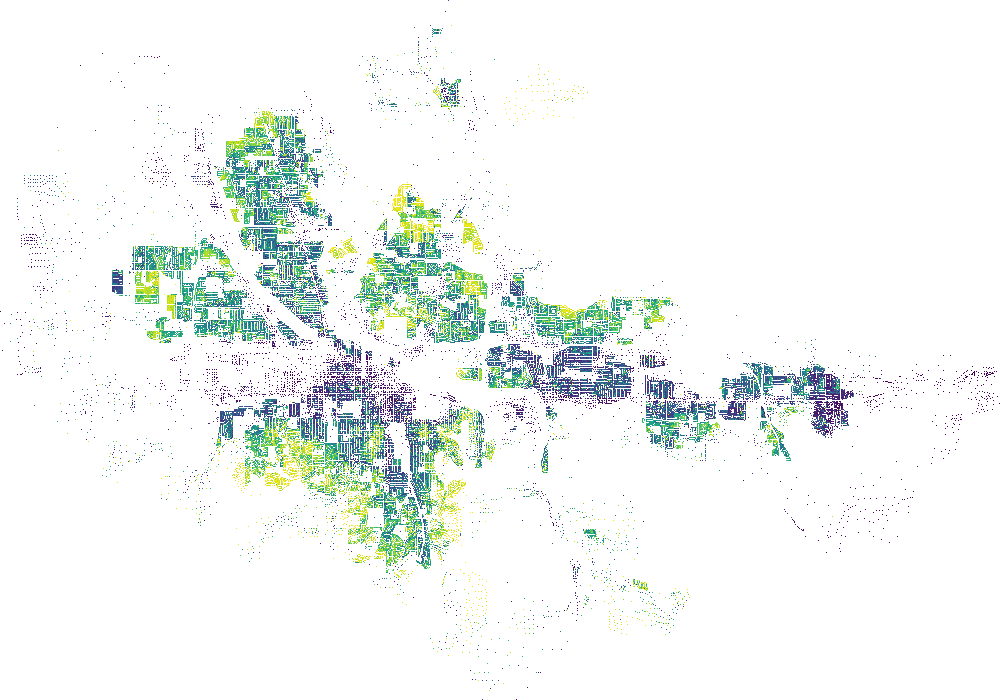

In [16]:
m.run()
visualize_variable('pred_multifamily_price')

In [17]:
m.name = 'repm_multifamily'
mm.register(m)

Saving 'repm_multifamily.yaml': /home/janowicz/clients/lcog/lcog/lcog/configs
Registering model step 'repm_multifamily'


## REPM- Craigslist residential

In [18]:
m = OLSRegressionStep()

m.tables = ['buildings']
m.filters = 'ave_annual_rent_sqft_400m > .1'

m.out_column = 'pred_residential_price'

In [19]:
model_spec = {'left_side': 'ave_annual_rent_sqft_400m',
              'right_side': {'block_groups_density_households',
                            'blocks_total_jobs',
                            'parcels_mean_age_of_head_ave_2800_flat',
                            'parcels_mean_income_ave_2000_linear',
                            'zone_districts_prop_building_type_id_1220',
                            'zone_districts_prop_income_quartile_4',
                            'zones_prop_building_type_id_5100',
                            'zones_prop_sector_id_5',
                            'zones_sum_persons_5_md_offpeak_travel_time',
                            'zones_total_jobs_5_am_peak_travel_time'}}

m.model_expression = util.str_model_expression(model_spec)
m.fit()

Disaggregating density_households to buildings from block_groups
Calculating density of households for block_groups
Calculating sum_acres of parcels for block_groups
Disaggregating prop_sector_id_5 to buildings from zones
Calculating proportion sector_id 5 for zones
Disaggregating mean_income_ave_2000_linear to buildings from parcels
Disaggregating sum_persons_5_md_offpeak_travel_time to buildings from zones
Disaggregating prop_income_quartile_4 to buildings from zone_districts
Disaggregating zone_district_id to households from parcels
Calculating proportion income_quartile 4 for zone_districts
Calculating number of households for zone_districts
Disaggregating prop_building_type_id_1220 to buildings from zone_districts
Calculating proportion building_type_id 1220 for zone_districts
Calculating number of buildings for zone_districts
Disaggregating total_jobs_5_am_peak_travel_time to buildings from zones
                                OLS Regression Results                              

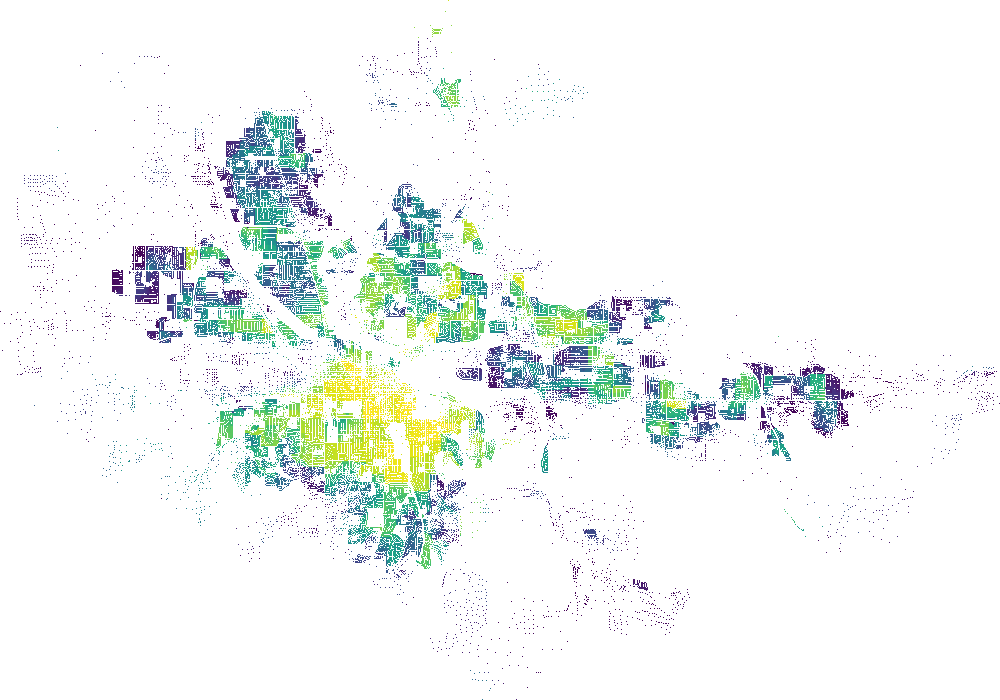

In [20]:
m.run()
visualize_variable('pred_residential_price')

In [21]:
orca.get_table('buildings').pred_residential_price.describe()

count    76897.000000
mean        14.474725
std          1.458623
min          8.377088
25%         13.540334
50%         14.259228
75%         15.078819
max         23.259604
dtype: float64

In [22]:
m.name = 'repm_residential'
mm.register(m)

Saving 'repm_residential.yaml': /home/janowicz/clients/lcog/lcog/lcog/configs
Registering model step 'repm_residential'


## REPM- office

In [23]:
m = OLSRegressionStep()

m.tables = ['buildings']
m.filters = '(impval_per_unit > 0) & (repm_id == "office")'

m.out_column = 'pred_office_price'

In [24]:
model_spec = {'left_side': 'impval_per_unit',
              'right_side': {'blocks_median_acres',
              'blocks_prop_building_type_id_5100',
              'blocks_prop_sector_id_13',
              'blocks_total_jobs',
              'parcels_mean_income_ave_2800_linear',
              'zones_mean_non_residential_sqft',
              'zones_total_jobs_25_md_offpeak_travel_time'}}

m.model_expression = util.str_model_expression(model_spec)
m.fit()

Disaggregating mean_non_residential_sqft to buildings from zones
Calculating mean_non_residential_sqft of buildings for zones
Disaggregating prop_building_type_id_5100 to buildings from blocks
Calculating proportion building_type_id 5100 for blocks
Disaggregating mean_income_ave_2800_linear to buildings from parcels
Disaggregating median_acres to buildings from blocks
Calculating median_acres of parcels for blocks
Disaggregating prop_sector_id_13 to buildings from blocks
Calculating proportion sector_id 13 for blocks
Disaggregating total_jobs_25_md_offpeak_travel_time to buildings from zones
                            OLS Regression Results                            
Dep. Variable:        impval_per_unit   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     13.58
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           1.72e-16
Time: 

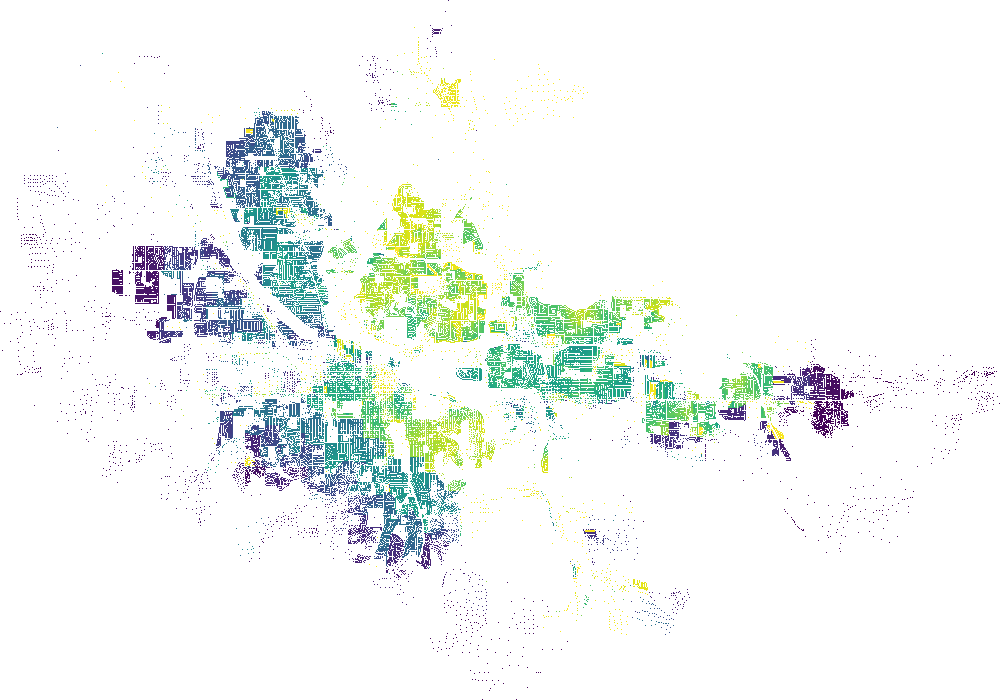

In [25]:
m.run()
visualize_variable('pred_office_price')

In [26]:
m.name = 'repm_office'
mm.register(m)

Saving 'repm_office.yaml': /home/janowicz/clients/lcog/lcog/lcog/configs
Registering model step 'repm_office'


## REPM- retail

In [27]:
m = OLSRegressionStep()

m.tables = ['buildings']
m.filters = '(impval_per_unit > 0) & (repm_id == "retail")'

m.out_column = 'pred_retail_price'

In [28]:
model_spec = {'left_side': 'impval_per_unit',
             'right_side': {'blocks_prop_sector_id_5',
              'parcels_density_jobs',
              'parcels_mean_income_ave_4400_linear',
              'zone_districts_prop_building_type_id_5100',
              'zones_mean_non_residential_sqft'}}

m.model_expression = util.str_model_expression(model_spec)
m.fit()

Disaggregating prop_building_type_id_5100 to buildings from zone_districts
Calculating proportion building_type_id 5100 for zone_districts
Disaggregating density_jobs to buildings from parcels
Calculating density of jobs for parcels
Disaggregating prop_sector_id_5 to buildings from blocks
Calculating proportion sector_id 5 for blocks
                            OLS Regression Results                            
Dep. Variable:        impval_per_unit   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.237
Date:                Fri, 25 Jan 2019   Prob (F-statistic):           9.34e-05
Time:                        13:46:21   Log-Likelihood:                -6916.4
No. Observations:                1052   AIC:                         1.384e+04
Df Residuals:                    1046   BIC:                         1.387e+04
Df Model:                       

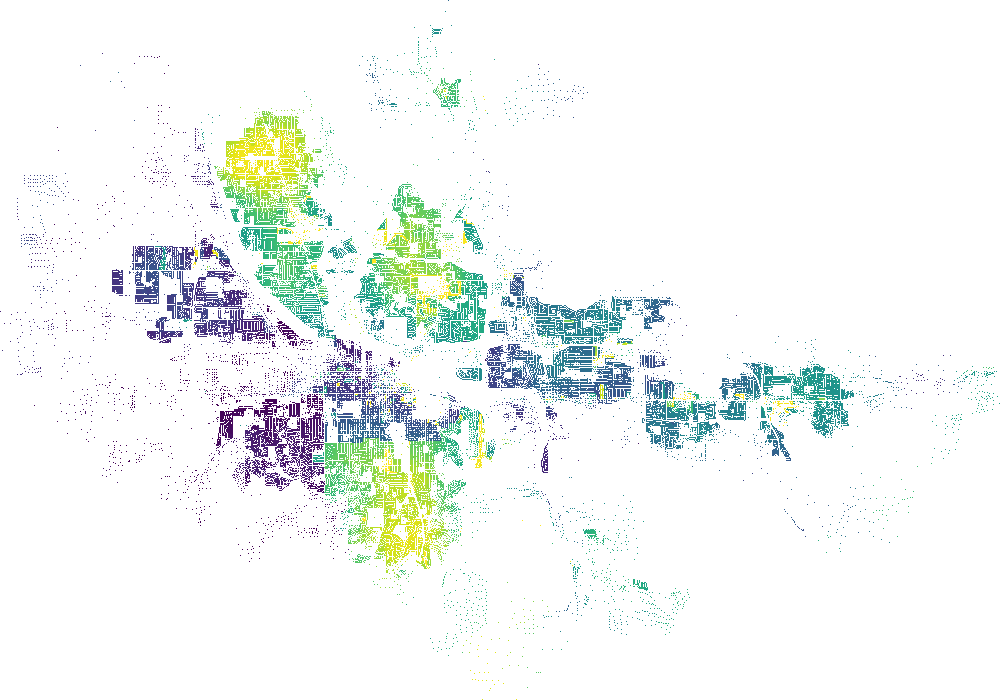

In [29]:
m.run()
visualize_variable('pred_retail_price')

In [30]:
m.name = 'repm_retail'
mm.register(m)

Saving 'repm_retail.yaml': /home/janowicz/clients/lcog/lcog/lcog/configs
Registering model step 'repm_retail'


## REPM- industrial 

In [31]:
m = OLSRegressionStep()

m.tables = ['buildings']
m.filters = '(impval_per_unit > 0) & (repm_id == "industrial")'

m.out_column = 'pred_industrial_price'

In [32]:
model_spec = {'left_side': 'impval_per_unit',
 'right_side': {'block_groups_mean_acres',
  'block_groups_prop_sector_id_11',
  'block_groups_ratio_jobs_to_households',
  'locations_mean_non_residential_sqft',
  'locations_prop_building_type_id_1220',
  'parcels_prop_building_type_id_5100',
  'zones_total_jobs_5_md_offpeak_travel_time'}}

m.model_expression = util.str_model_expression(model_spec)
m.fit()

Disaggregating prop_building_type_id_1220 to buildings from locations
Disaggregating location_id to buildings from parcels
Calculating proportion building_type_id 1220 for locations
Calculating number of buildings for locations
Disaggregating total_jobs_5_md_offpeak_travel_time to buildings from zones
Disaggregating prop_sector_id_11 to buildings from block_groups
Calculating proportion sector_id 11 for block_groups
Disaggregating mean_non_residential_sqft to buildings from locations
Calculating mean_non_residential_sqft of buildings for locations
Disaggregating ratio_jobs_to_households to buildings from block_groups
Calculating ratio of jobs to households for block_groups
Disaggregating prop_building_type_id_5100 to buildings from parcels
Calculating proportion building_type_id 5100 for parcels
Calculating number of buildings for parcels
Disaggregating mean_acres to buildings from block_groups
Calculating mean_acres of parcels for block_groups
                            OLS Regressio

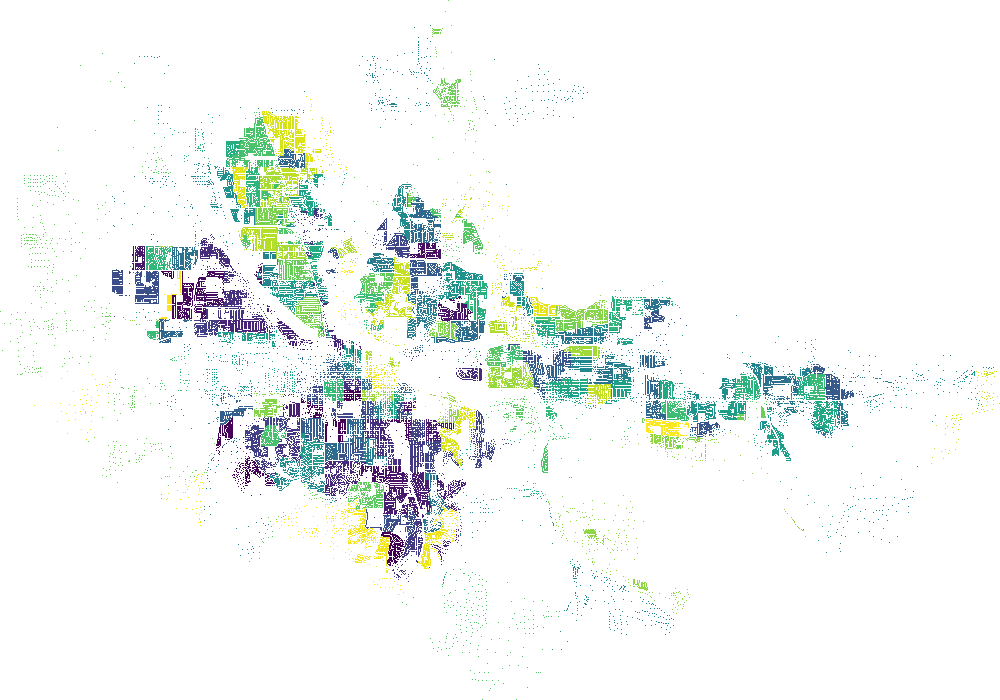

In [33]:
m.run()
visualize_variable('pred_industrial_price')

In [34]:
m.name = 'repm_industrial'
mm.register(m)

Saving 'repm_industrial.yaml': /home/janowicz/clients/lcog/lcog/lcog/configs
Registering model step 'repm_industrial'
